In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Define an extension to the sqlalchemy.ext.declarative system which automatically 
# generates mapped classes and relationships from a database schema, 
# typically though not necessarily one which is reflected.

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

# mapped classes are now created with names by default
# matching that of the table name.

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
mysession = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = mysession.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f'{most_recent_date}')

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = (dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).date()
print(f'{one_year_ago}')

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = mysession.\
query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= one_year_ago).\
filter(Measurement.prcp != None).\
order_by(Measurement.date).all()

precipitation_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])
precipitation_scores_df.set_index('Date', inplace=True)

precipitation_scores_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [13]:
# Sort the dataframe by date
# It is already ordered <<order_by(Measurement.date).all()>>

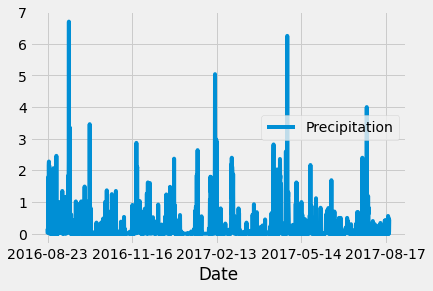

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_scores_df.plot().get_figure()
ax.savefig("precipitation_scores_last_year.png")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = mysession.query(Station).count()
print(f"There are {total_number_stations} stations.")

There are 9 stations.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = mysession.\
query(Measurement.station, func.count(Measurement.station)).\
filter(Measurement.prcp != None).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
all()

the_most_active_station = most_active_stations[0][0]
print(f'The most active station ID is {the_most_active_station}')

# List the stations and the counts in descending order.
most_active_stations_df = pd.DataFrame(most_active_stations, columns=['Station', 'Measurements'])
most_active_stations_df.set_index('Station', inplace=True)

most_active_stations_df

The most active station ID is USC00519281


,Measurements
Station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
average_temperatures = mysession.\
query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == the_most_active_station).all()

print(f'The Lowest temperature for {the_most_active_station} is {average_temperatures[0][0]}')
print(f'The Highest temperature for {the_most_active_station} is {average_temperatures[0][1]}')
print(f'The Average temperature for {the_most_active_station} is {average_temperatures[0][2]}')

The Lowest temperature for USC00519281 is 54.0
The Highest temperature for USC00519281 is 85.0
The Average temperature for USC00519281 is 71.66378066378067


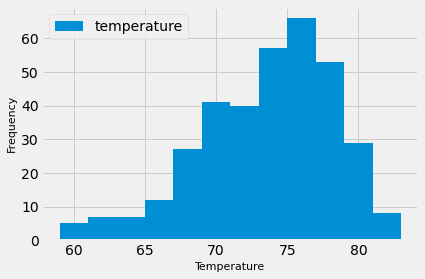

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperatures_scores_this_station = mysession.\
query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= one_year_ago).\
filter(Measurement.tobs != None).\
filter(Measurement.station == the_most_active_station).\
order_by(Measurement.date).all()

# Put data into dataframe 
temperatures_scores_this_station_df = pd.DataFrame(data=temperatures_scores_this_station, columns=["date", "tobs"])
temperatures_scores_this_station_df = temperatures_scores_this_station_df.set_index('date', drop=True)

#Plot the results as a histogram with bins=12
plt.hist(temperatures_scores_this_station_df['tobs'],12, label="temperature")
plt.ylabel("Frequency", fontsize=11)
plt.xlabel("Temperature", fontsize=11)
plt.legend()
plt.savefig("Temperature_observation data_for_the_most_active station_last_12months.png")
plt.show()

# Close session

In [21]:
# Close Session
mysession.close()